# Two particles in an enclosed box

In [43]:
import numpy as np
import sympy as sp

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
figsave_dir = '..\\out\\'

figsize_x = 15
figsize_y = 13

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.1',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Assignment

[//]: # (Banish \phi from this realm)
$$
\renewcommand{\phi}{\varphi}
$$

A feladatunk a feladat kiírásához csatolt levezetésben található várható értékek kiszámítása a végtelenül mély potenciálgödörben mozgó kétrészecskés esetre. A kiírás alapján azt az esetet kell megvizsgáljuk, ahol az egyik részecske $\phi_{a}$, míg a másik $\phi_{b}$ állapotban helyezkedik el. A [Marianna Safronova](www.physics.udel.edu/~msafrono/) által írt jegyzet mindhárom esetre (klasszikus, bozonok, fermionok) kitér, melyben az egyes kétrészecske-állapotokhoz tartozó várhatóértékek az alábbi egyrészecskés várhatóértékkel vannak kifejezve:

$$
\left< x \right>_{a}
=
\int_{- \infty}^{\infty} x_{1} \cdot \left| \phi_{a} \left( x_{1} \right) \right|^{2}\,\text{d}x_{1}
$$

$$
\left< x \right>_{b}
=
\int_{- \infty}^{\infty} x_{2} \cdot \left| \phi_{b} \left( x_{2} \right) \right|^{2}\,\text{d}x_{2}
$$

$$
\left< x^{2} \right>_{a}
=
\int_{- \infty}^{\infty} x_{1}^{2} \cdot \left| \phi_{a} \left( x_{1} \right) \right|^{2}\,\text{d}x_{1}
$$

$$
\left< x^{2} \right>_{b}
=
\int_{- \infty}^{\infty} x_{2}^{2} \cdot \left| \phi_{b} \left( x_{2} \right) \right|^{2}\,\text{d}x_{2}
$$

Ahhoz, hogy bármelyik esetre megkaphassuk az $\left< x_{1}^{2} \right>$, $\left< x_{2}^{2} \right>$, valamint $\left< x_{1}, x_{2} \right>$ értékeket, a fentieket értékét kell csak meghatározzuk.

A $\phi_{n} \left( x \right)$ egyrészecskés hullámfüggvények a

$$
\phi_{n} \left( x \right)
=
\sqrt{\frac{2}{L}} \sin \left( \frac{n \pi}{L} x \right)
$$

alakban adhatóak meg. A négy fenti egyenlet így az alábbi formát ölti:

$$
\left< x \right>_{a}
=
\int_{- \infty}^{\infty} x_{1} \cdot \left| \phi_{a} \left( x_{1} \right) \right|^{2}\,\text{d}x_{1}
=
\int_{- \infty}^{\infty} x_{1} \cdot \left| \sqrt{\frac{2}{L}} \sin \left( \frac{a \pi}{L} x_{1} \right) \right|^{2}\,\text{d}x_{1}
$$

$$
\left< x \right>_{b}
=
\int_{- \infty}^{\infty} x_{2} \cdot \left| \phi_{b} \left( x_{2} \right) \right|^{2}\,\text{d}x_{2}
=
\int_{- \infty}^{\infty} x_{2} \cdot \left| \sqrt{\frac{2}{L}} \sin \left( \frac{b \pi}{L} x_{2} \right) \right|^{2}\,\text{d}x_{2}
$$

$$
\left< x^{2} \right>_{a}
=
\int_{- \infty}^{\infty} x_{1}^{2} \cdot \left| \phi_{a} \left( x_{1} \right) \right|^{2}\,\text{d}x_{1}
=
\int_{- \infty}^{\infty} x_{1}^{2} \cdot \left| \sqrt{\frac{2}{L}} \sin \left( \frac{a \pi}{L} x_{1} \right) \right|^{2}\,\text{d}x_{1}
$$

$$
\left< x^{2} \right>_{b}
=
\int_{- \infty}^{\infty} x_{2}^{2} \cdot \left| \phi_{b} \left( x_{2} \right) \right|^{2}\,\text{d}x_{2}
=
\int_{- \infty}^{\infty} x_{2}^{2} \cdot \left| \sqrt{\frac{2}{L}} \sin \left( \frac{b \pi}{L} x_{2} \right) \right|^{2}\,\text{d}x_{2}
$$

Mivel a hullámfüggvények ebben a konkrét esetben tisztán valósak, így az abszolútérték mindig egyenletben elhagyható a négyzetre emelés miatt:

$$
\left< x \right>_{a}
\equiv
\int_{- \infty}^{\infty} x_{1} \cdot \frac{2}{L} \sin^{2} \left( \frac{a \pi}{L} x_{1} \right)\,\text{d}x_{1}
$$

$$
\left< x \right>_{b}
\equiv
\int_{- \infty}^{\infty} x_{2} \cdot \frac{2}{L} \sin^{2} \left( \frac{b \pi}{L} x_{2} \right)\,\text{d}x_{2}
$$

$$
\left< x^{2} \right>_{a}
\equiv
\int_{- \infty}^{\infty} x_{1}^{2} \cdot \frac{2}{L} \sin^{2} \left( \frac{a \pi}{L} x_{1} \right)\,\text{d}x_{1}
$$

$$
\left< x^{2} \right>_{b}
\equiv
\int_{- \infty}^{\infty} x_{2}^{2} \cdot \frac{2}{L} \sin^{2} \left( \frac{b \pi}{L} x_{2} \right)\,\text{d}x_{2}
$$

Ezeket az integrálokat pl. `sympy` segítségével értékelhetjük ki. Emeljük ki a konstanst és jelöljük a $\sin$ függvényben található szintén konstans részt $C_{1}$ és $C_{2}$-vel:

$$
\left< x \right>_{a}
\equiv
\frac{2}{L}
\int_{- \infty}^{\infty} x_{1} \sin^{2} \left( C_{1} x_{1} \right)\,\text{d}x_{1}
$$

$$
\left< x \right>_{b}
\equiv
\frac{2}{L}
\int_{- \infty}^{\infty} x_{2} \sin^{2} \left( C_{2} x_{2} \right)\,\text{d}x_{2}
$$

$$
\left< x^{2} \right>_{a}
\equiv
\frac{2}{L}
\int_{- \infty}^{\infty} x_{1}^{2} \sin^{2} \left( C_{1} x_{1} \right)\,\text{d}x_{1}
$$

$$
\left< x^{2} \right>_{b}
\equiv
\frac{2}{L}
\int_{- \infty}^{\infty} x_{2}^{2} \sin^{2} \left( C_{2} x_{2} \right)\,\text{d}x_{2}
$$

Helyezzük a doboz egyik felét a $0$ pontba, másikat pedig az $L$-be. Ekkor az integrálok határai erre a tartományra szűkülnek:

$$
\left< x \right>_{a}
\equiv
\frac{2}{L}
\int_{0}^{L} x_{1} \sin^{2} \left( C_{1} x_{1} \right)\,\text{d}x_{1}
$$

$$
\left< x \right>_{b}
\equiv
\frac{2}{L}
\int_{0}^{L} x_{2} \sin^{2} \left( C_{2} x_{2} \right)\,\text{d}x_{2}
$$

$$
\left< x^{2} \right>_{a}
\equiv
\frac{2}{L}
\int_{0}^{L} x_{1}^{2} \sin^{2} \left( C_{1} x_{1} \right)\,\text{d}x_{1}
$$

$$
\left< x^{2} \right>_{b}
\equiv
\frac{2}{L}
\int_{0}^{L} x_{2}^{2} \sin^{2} \left( C_{2} x_{2} \right)\,\text{d}x_{2}
$$

A bozonok és fermionok esetén egy ötödik fajta várható értéket is fel kell használnunk, mely a következő:

$$
\left< x_{ab} \right>
=
\int_{0}^{L} x \phi_{a}^{\ast} \left( x \right) \phi_{b} \left( x \right)
=
\int_{0}^{L} x \cdot \sin \left( C_{1} x \right) \cdot \sin \left( C_{2} x \right)\,\text{d}x
$$

---

### Kiértékelés

In [183]:
_x = sp.Symbol('x')
x_1 = sp.Symbol('x_1')
x_2 = sp.Symbol('x_2')
C_1 = sp.Symbol('C_1')
C_2 = sp.Symbol('C_2')
L = sp.Symbol('L')

#### 1. és 2. integrál

In [159]:
int_1 = x_1 * sp.sin(C_1 * x_1)**2
int_1

x_1*sin(C_1*x_1)**2

In [160]:
result_1 = sp.integrate(int_1, (x_1, 0, L))
result_1

Piecewise((L**2*sin(C_1*L)**2/4 + L**2*cos(C_1*L)**2/4 - L*sin(C_1*L)*cos(C_1*L)/(2*C_1) - cos(C_1*L)**2/(4*C_1**2) + 1/(4*C_1**2), (C_1 > -oo) & (C_1 < oo) & Ne(C_1, 0)), (0, True))

In [161]:
int_2 = x_2 * sp.sin(C_2 * x_2)**2
int_2

x_2*sin(C_2*x_2)**2

In [162]:
result_2 = sp.integrate(int_2, (x_2, 0, L))
result_2

Piecewise((L**2*sin(C_2*L)**2/4 + L**2*cos(C_2*L)**2/4 - L*sin(C_2*L)*cos(C_2*L)/(2*C_2) - cos(C_2*L)**2/(4*C_2**2) + 1/(4*C_2**2), (C_2 > -oo) & (C_2 < oo) & Ne(C_2, 0)), (0, True))

#### 3. és 4. integrál

In [163]:
int_3 = x_1**2 * sp.sin(C_1 * x_1)**2
int_3

x_1**2*sin(C_1*x_1)**2

In [164]:
result_3 = sp.integrate(int_3, (x_1, 0, L))
result_3

Piecewise((L**3*sin(C_1*L)**2/6 + L**3*cos(C_1*L)**2/6 - L**2*sin(C_1*L)*cos(C_1*L)/(2*C_1) + L*sin(C_1*L)**2/(4*C_1**2) - L*cos(C_1*L)**2/(4*C_1**2) + sin(C_1*L)*cos(C_1*L)/(4*C_1**3), (C_1 > -oo) & (C_1 < oo) & Ne(C_1, 0)), (0, True))

In [165]:
int_4 = x_2**2 * sp.sin(C_2 * x_2)**2
int_4

x_2**2*sin(C_2*x_2)**2

In [166]:
result_4 = sp.integrate(int_4, (x_2, 0, L))
result_4

Piecewise((L**3*sin(C_2*L)**2/6 + L**3*cos(C_2*L)**2/6 - L**2*sin(C_2*L)*cos(C_2*L)/(2*C_2) + L*sin(C_2*L)**2/(4*C_2**2) - L*cos(C_2*L)**2/(4*C_2**2) + sin(C_2*L)*cos(C_2*L)/(4*C_2**3), (C_2 > -oo) & (C_2 < oo) & Ne(C_2, 0)), (0, True))

#### 5. integrál

In [184]:
int_5 = _x * sp.sin(C_1 * _x) * sp.sin(C_2 * _x)
int_5

x*sin(C_1*x)*sin(C_2*x)

In [185]:
result_5 = sp.integrate(int_5, (x, 0, L))
result_5

Piecewise((0, (Eq(C_1, 0) & Eq(C_2, 0)) | (Eq(C_1, 0) & Eq(C_1, C_2) & Eq(C_2, 0)) | (Eq(C_1, 0) & Eq(C_2, 0) & Eq(C_1, -C_2)) | (Eq(C_1, 0) & Eq(C_1, C_2) & Eq(C_2, 0) & Eq(C_1, -C_2))), (-L**2*sin(C_2*L)**2/4 - L**2*cos(C_2*L)**2/4 + L*sin(C_2*L)*cos(C_2*L)/(2*C_2) + cos(C_2*L)**2/(4*C_2**2) - 1/(4*C_2**2), Eq(C_1, -C_2) | (Eq(C_1, 0) & Eq(C_1, -C_2)) | (Eq(C_1, C_2) & Eq(C_1, -C_2)) | (Eq(C_2, 0) & Eq(C_1, -C_2)) | (Eq(C_1, 0) & Eq(C_1, C_2) & Eq(C_1, -C_2)) | (Eq(C_1, C_2) & Eq(C_2, 0) & Eq(C_1, -C_2))), (L**2*sin(C_2*L)**2/4 + L**2*cos(C_2*L)**2/4 - L*sin(C_2*L)*cos(C_2*L)/(2*C_2) - cos(C_2*L)**2/(4*C_2**2) + 1/(4*C_2**2), Eq(C_1, C_2) | (Eq(C_1, 0) & Eq(C_1, C_2)) | (Eq(C_1, C_2) & Eq(C_2, 0))), (-C_1**3*L*sin(C_2*L)*cos(C_1*L)/(C_1**4 - 2*C_1**2*C_2**2 + C_2**4) + C_1**2*C_2*L*sin(C_1*L)*cos(C_2*L)/(C_1**4 - 2*C_1**2*C_2**2 + C_2**4) + C_1**2*sin(C_1*L)*sin(C_2*L)/(C_1**4 - 2*C_1**2*C_2**2 + C_2**4) + C_1*C_2**2*L*sin(C_2*L)*cos(C_1*L)/(C_1**4 - 2*C_1**2*C_2**2 + C_2**4) + 2*C_1

---

A `sympy` segítségével megkapott alakok hosszúak, azonban a megfelelő helyettesítési értékek segítségével könnyen kiértékelhetőek. A számítás előtt az integrandusban szereplő konstans tagot kiemeltem, így a várható értékek helyes eredménye egy $2\,/\,L$-es szorzóval kapható meg.

Hogy valami konkrétat is mondjak, vegyük a doboz szélességét $L = 1$ nagyságúnak, a két állapot pedig legyen $a=1$ és $b=2$. A két konstans $C_{1} = a \pi\,/\,L$ és $C_{2} = b \pi\,/\,L$. Ekkor a várható értékek a következőek:

In [169]:
eval_1 = 2/1 * result_1.evalf(subs={L: 1, C_1: 1*np.pi / 1})
eval_1

0.500000000000000

In [170]:
eval_2 = 2/1 * result_2.evalf(subs={L: 1, C_2: 2*np.pi / 1})
eval_2

0.500000000000000

In [171]:
eval_3 = 2/1 * result_3.evalf(subs={L: 1, C_1: 1*np.pi / 1})
eval_3

0.282672741512164

In [172]:
eval_4 = 2/1 * result_4.evalf(subs={L: 1, C_2: 2*np.pi / 1})
eval_4

0.320668185378041

In [186]:
eval_5 = 2/1 * result_5.evalf(subs={L: 1, C_1: 1*np.pi / 1, C_2: 2*np.pi / 1})
eval_5

-0.180126548697489

Ahol a négyzetes várható érték esetében, nagyon nagy $a$, vagy $b$ paraméterek értékére ezen $L$ mellett $1\,/\,3$-hoz tartanak.

In [173]:
sp.limit(result_3, C_1, sp.oo)

L**3*sin(zoo*L)**2/6 + L**3*cos(zoo*L)**2/6

In [180]:
N_values = np.arange(1,100,1)
x_sq = [2 * result_3.evalf(subs={L: 1, C_1: N*np.pi / 1}) for N in N_values]

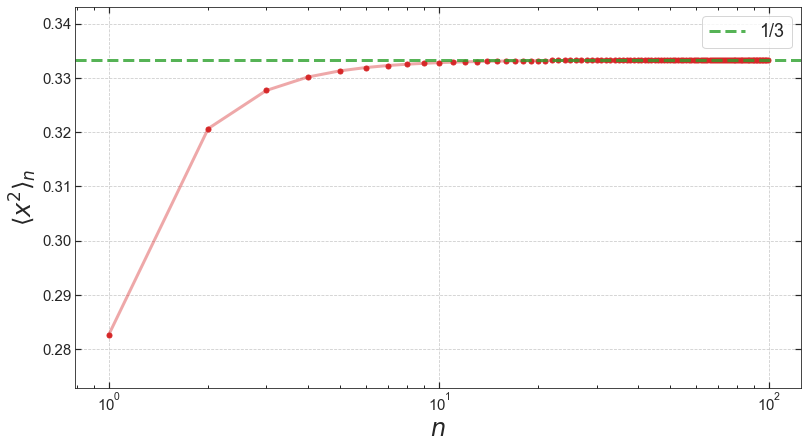

In [181]:
fig, axes = plt.subplots(figsize=(13,7))

axislabelsize = 24
axisticksize = 15
axislegendsize = 18
s_size = 5

axes.scatter(N_values, x_sq,
          color='tab:red', s=s_size**2)
axes.plot(N_values, x_sq,
          color='tab:red', lw=3, alpha = 0.4)
axes.axhline(y=1/3, label='1/3',
             color='tab:green', lw=3, ls='--', alpha=0.8)

axes.set_xscale('log')

axes.set_xlabel('$n$', fontsize=axislabelsize)
axes.set_ylabel('$\\left< x^{2} \\right>_{n}$', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='best', fontsize=axislegendsize)

plt.show()

A `sympy`-al történő számítás során megkaptuk az $\left< x \right>_{ab}$ és $\left< x^{2} \right>_{ab}$ értékeket, melyekkel kifejezhető válnak a kétrészecskés rendszer $\left< x_{1}^{2} \right>$, $\left< x_{2}^{2} \right>$ és $\left< x_{1}, x_{2} \right>$ várható értékei.

Példaként a szeparáció $\left( x_{1} - x_{2} \right)^{2}$ várható értékére az alábbi értékeket kapjuk különböző $n$ szintek esetén a három különböző esetben:

In [332]:
def expectations(N_1, N_2):
    
    x_a = np.array([float(2 * result_1.evalf(subs={L: 1, C_1: N*np.pi / 1})) for N in N_1])
    x_b = np.array([float(2 * result_2.evalf(subs={L: 1, C_2: N*np.pi / 1})) for N in N_2])
    x_a_sq = np.array([float(2 * result_3.evalf(subs={L: 1, C_1: N*np.pi / 1})) for N in N_1])
    x_b_sq = np.array([float(2 * result_4.evalf(subs={L: 1, C_2: N*np.pi / 1})) for N in N_2])
    
    return x_a, x_b, x_a_sq, x_b_sq

In [334]:
def expectation_extra(N_1, N_2):
    
    x_ab = np.zeros((len(N_1), len(N_2)))
    for i, n_1 in enumerate(N_1):
        for j, n_2 in enumerate(N_2):
            result = float(2 * result_5.evalf(subs={L: 1, C_1: n_1*np.pi / 1, C_2: n_2*np.pi / 1}))
            x_ab[i][j] = result
    
    return x_ab

In [335]:
def separation(N_1, N_2, mode='c'):
    
    c = mode.lower()[0]
    assert c == 'c' or c == 'b' or c == 'f', "Modes should be either 'classic' or 'boson' or 'fermion'!"
    
    x_a, x_b, x_a_sq, x_b_sq = expectations(N_1, N_2)
    
    x_a = np.meshgrid(x_a, x_a)[0]
    x_b = np.meshgrid(x_b, x_b)[0]
    x_a_sq = np.meshgrid(x_a_sq, x_a_sq)[0]
    x_b_sq = np.meshgrid(x_b_sq, x_b_sq)[0]
    
    if c == 'c':
        return x_a_sq + x_b_sq - 2 * x_a * x_b
        
    elif c == 'b':
        x_ab = expectation_extra(N_1, N_2)
        return x_a_sq + x_b_sq - 2 * x_a * x_b - 2*(x_ab**2)
        
    elif c == 'f':
        x_ab = expectation_extra(N_1, N_2)
        return x_a_sq + x_b_sq - 2 * x_a * x_b + 2*(x_ab**2)

In [336]:
N = np.arange(1,100,1)

In [337]:
sep_class = separation(N, N, mode='c')

In [338]:
sep_boson = separation(N, N, mode='b')

In [339]:
sep_fermi = separation(N, N, mode='f')

### Separations

In [340]:
N_1, N_2 = np.meshgrid(N,N)

In [341]:
def plot_separation(sep, save=False):

    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*figsize_x,nrows*figsize_y),
                             subplot_kw={'projection': '3d'})
    axes.view_init(20, 240)

    axislabelsize = 18
    axisticksize = 12
    axislabelpad = 19
    axistickpad = 12

    axes.plot_surface(N_1, N_2, np.nan_to_num(sep),
                      rstride=1, cstride=1, cmap='magma', linewidth=0, antialiased=False)

    axes.set_xlabel('$N_{1}$',
                    labelpad=axislabelpad, fontsize=axislabelsize)
    axes.set_ylabel('$N_{2}$',
                    labelpad=axislabelpad, fontsize=axislabelsize)
    axes.set_zlabel('$\\left< \\left( x_{1} - x_{2} \\right)^{2} \\right>$',
                    labelpad=axislabelpad+5, fontsize=axislabelsize)

    axes.tick_params(axis='both', which='major',
                     pad=axistickpad, labelsize=axisticksize)

    if save:
        fig.savefig(figsave_dir +
                    'separation.png')

    plt.show()

#### Classical case

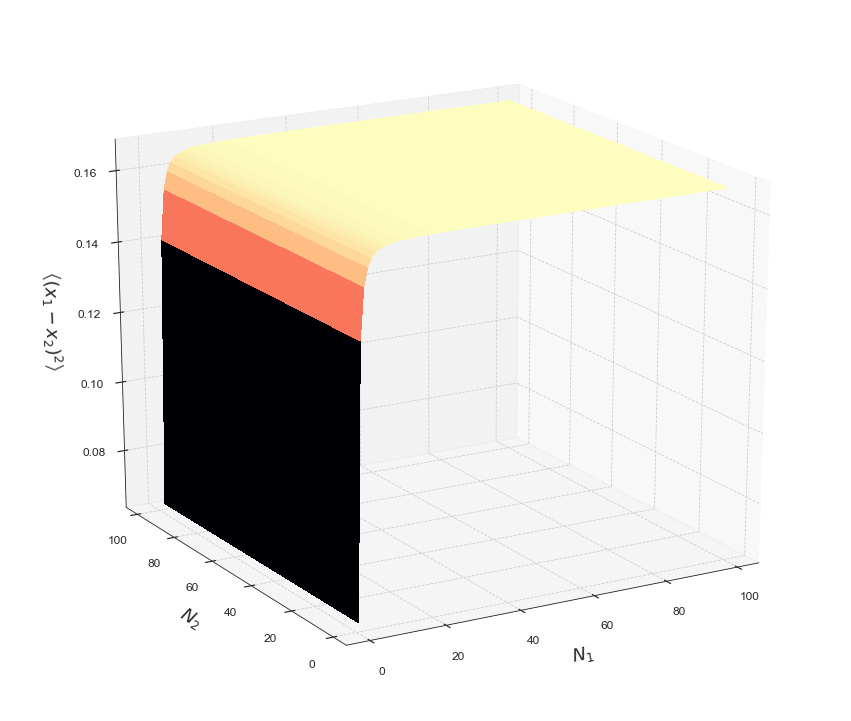

In [342]:
plot_separation(sep_class, save=False)

### Bosons

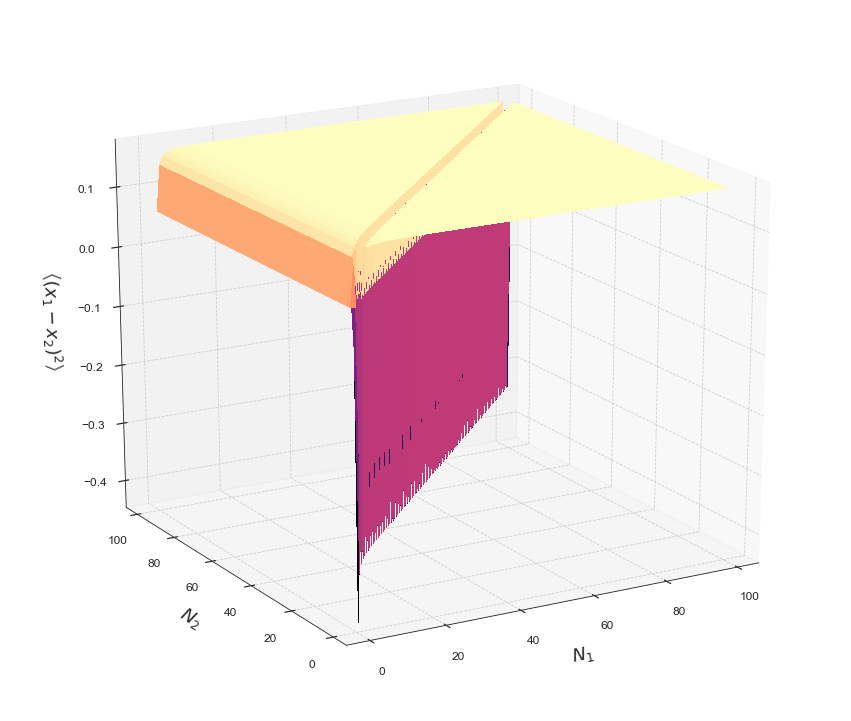

In [343]:
plot_separation(sep_boson, save=False)

### Fermions

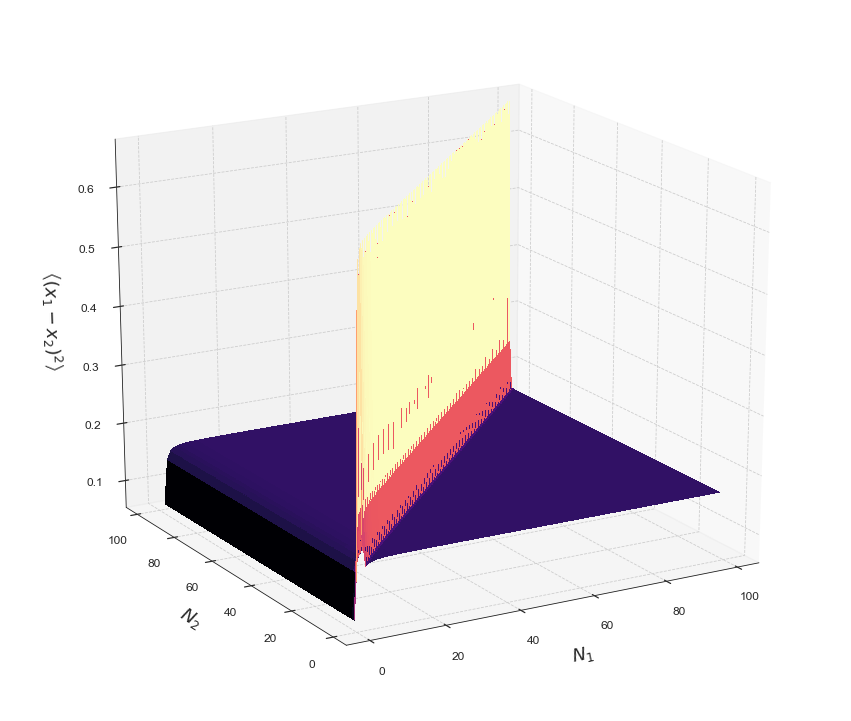

In [344]:
plot_separation(sep_fermi, save=False)

Szerintem a plottok bal oldalán levő levágás csak valamilyen numerikus hiba, elég fura lenne egy ilyen szimmetriatörés konzekvensen mindegyiknél... Valamint ha a két N érték megegyezik akkor mindegyik esetben érthetően furcsa dolgok jönnek elő.